In [1]:
import spacy
import textacy
import textacy.preprocessing
import textacy.resources
from spacy.symbols import ORTH, POS, NOUN, VERB,PRON
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt 
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from networkx.readwrite import json_graph;
import json
from afinn import Afinn
afn = Afinn()
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
lemmatizer = WordNetLemmatizer()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from sentistrength import PySentiStr
senti = PySentiStr()
senti.setSentiStrengthPath('D:/github/causal-graph-acquisition/SentiStrengthCom.jar')
senti.setSentiStrengthLanguageFolderPath('D:/github/causal-graph-acquisition/SentStrength_Data_Sept2011/')
import pandas as pd
from IPython.display import display
import collections
from pd_replicator import replicator

from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
MODEL = f"cardiffnlp/twitter-xlm-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
from nltk.corpus import stopwords
set(stopwords.words('english'))

from nltk.stem import PorterStemmer
ps = PorterStemmer()

nlp = spacy.load("en_core_web_sm")

import inflect
m = inflect.engine()
from lemminflect import getInflection

from scipy.special import kl_div

import pysmile
pysmile.License((
	b"SMILE LICENSE e42950f2 b58d6fac e3c14a1e "
	b"THIS IS AN ACADEMIC LICENSE AND CAN BE USED "
	b"SOLELY FOR ACADEMIC RESEARCH AND TEACHING, "
	b"AS DEFINED IN THE BAYESFUSION ACADEMIC "
	b"SOFTWARE LICENSING AGREEMENT. "
	b"Serial #: cpdxi66bo1rzx2upxofz3qbdv "
	b"Issued for: Solat Jabeen (solatjabeen@yahoo.com) "
	b"Academic institution: Institute of Business Administration "
	b"Valid until: 2025-04-01 "
	b"Issued by BayesFusion activation server"
	),[
	0xa8,0x81,0x5b,0x93,0xa4,0x03,0x2f,0xeb,0xc4,0xdc,0x59,0x52,0x2c,0x21,0x10,0x6c,
	0xb3,0x9e,0xba,0xdf,0x2d,0x9a,0x04,0x60,0x5a,0x18,0x79,0xc5,0x47,0xfc,0x91,0x47,
	0xbc,0x1a,0x54,0x62,0xc7,0xc8,0x0f,0xc2,0x5c,0x2a,0xdb,0xc6,0x4b,0x3e,0xfe,0x8d,
	0xc0,0x34,0xd5,0x3d,0xc4,0xed,0x58,0x1c,0x36,0xda,0xa9,0x37,0x9f,0x15,0x55,0x35])

In [2]:
dagCauseSents = []

edge1 = './Text/Test_Narrative_CS.txt'
narrative = open(edge1, encoding="utf8").read()
narrative = textacy.preprocessing.normalize_quotation_marks(narrative)
narrative = narrative.lower()

raw_sentences = sent_tokenize(narrative)

print(len(raw_sentences))

for s in raw_sentences:
    dagCauseSents.append(s)

17


In [3]:
import csv 

dagCauseTriples = []
dagCauseVerbs = []

csv_filename = './Text/Test_Narrative_CT.txt'
with open(csv_filename) as f:
    reader = csv.reader(f)
    dagCauseTriples = list(tuple(line) for line in reader)
    
for s in dagCauseTriples:
    dagCauseVerbs.append(s[1])

In [4]:
for i,j,k in zip(dagCauseSents,dagCauseTriples,dagCauseVerbs):
    print(i,j,k)

pakistan army negatively impacts pakistan enemies. ('pakistan army', 'negatively impacts', 'pakistan enemies') negatively impacts
pakistan army positively impacts pakistan's continued existence. ('pakistan army', 'positively impacts', "pakistan's continued existence") positively impacts
india positively impacts pakistan enemies. ('india', 'positively impacts', 'pakistan enemies') positively impacts
pakistan enemies negatively impact pakistan's continued existence. ('pakistan enemies', 'negatively impact', "pakistan's continued existence") negatively impact
pakistan's continued existence positively impacts pakistan. ("pakistan's continued existence", 'positively impacts', 'pakistan') positively impacts
aq khan positively impacts nuclear program. ('aq khan', 'positively impacts', 'nuclear program') positively impacts
nuclear program positively impacts nuclear bombs. ('nuclear program', 'positively impacts', 'nuclear bombs') positively impacts
nuclear bombs positively impacts pakistan's c

Nodes: 14
Edges: 17
pakistan army , pakistan enemies
pakistan army , pakistan's continued existence
india , pakistan enemies
pakistan enemies , pakistan's continued existence
pakistan's continued existence , pakistan
aq khan , nuclear program
nuclear program , nuclear bombs
nuclear program , nuclear power
nuclear program , advanced and powerful nuclear country
nuclear bombs , pakistan's continued existence
nuclear power , prestige
prestige , national respect
national respect , pakistan
advanced and powerful nuclear country , prestige
advanced and powerful nuclear country , national respect
usa , nuclear program
zulfikar ali butto , advanced and powerful nuclear country


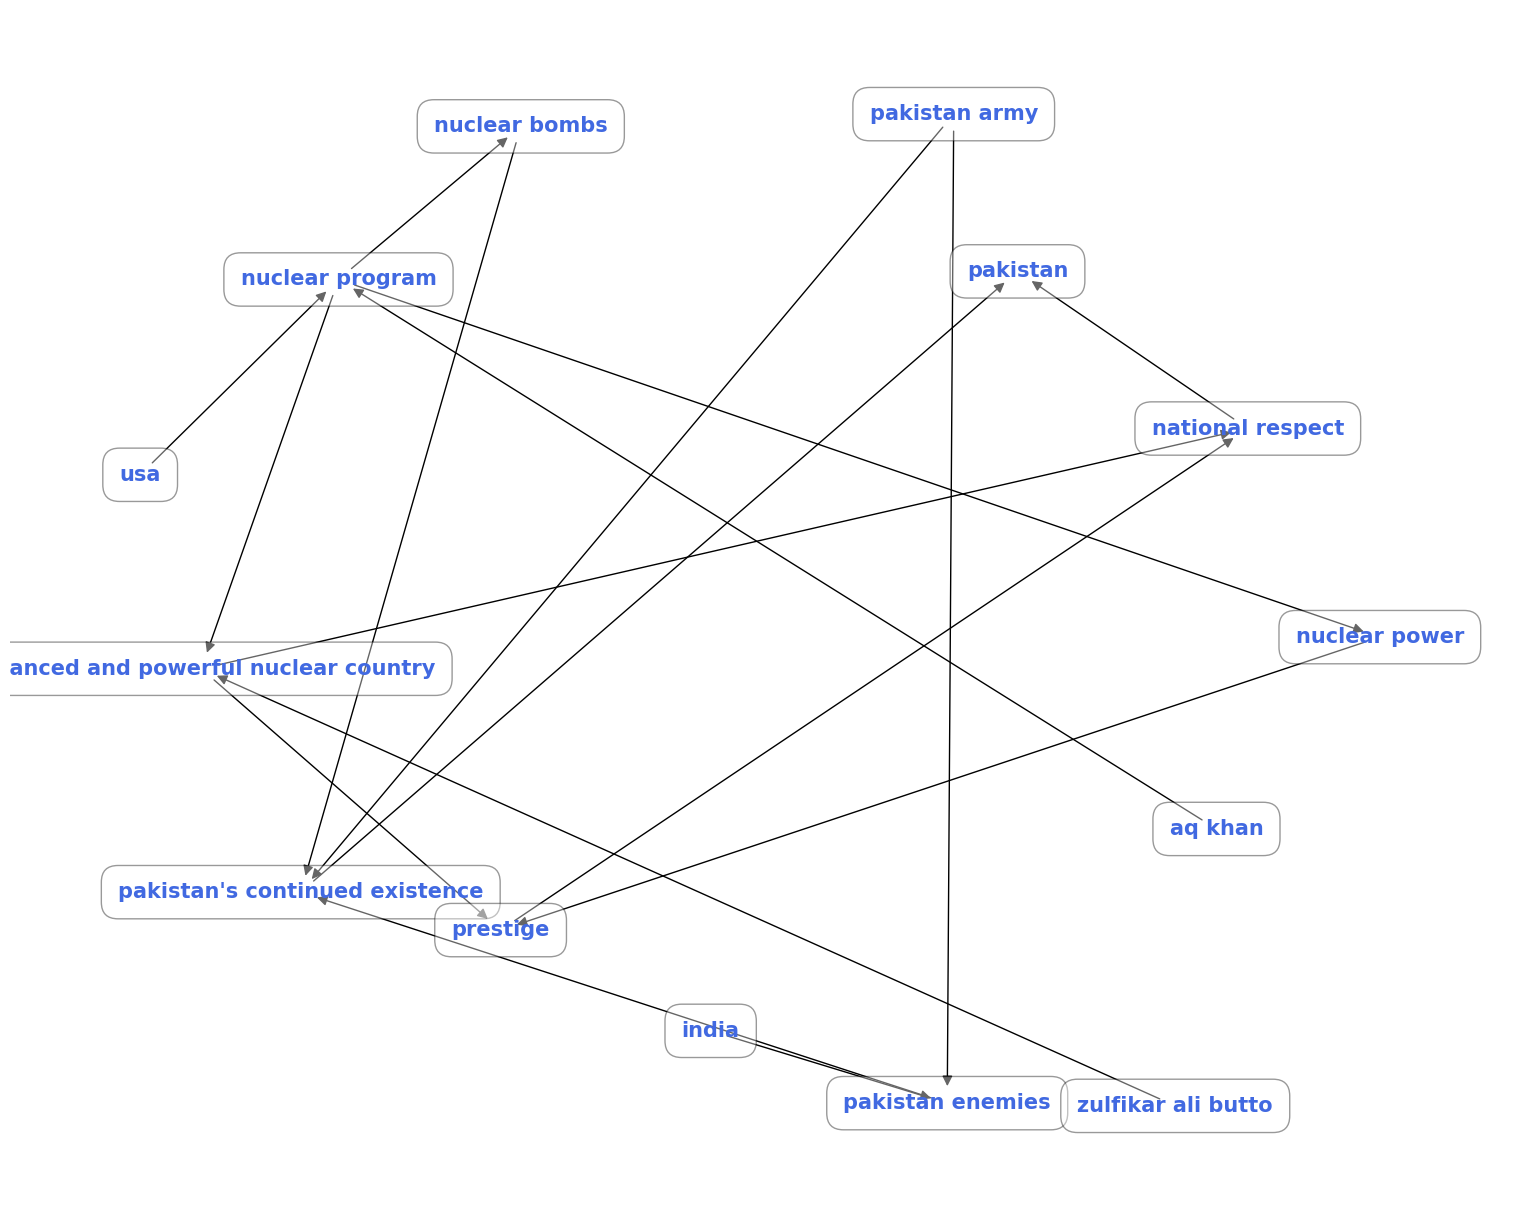

In [5]:
cg = nx.DiGraph()
cg.add_node("pakistan army",id = str("pakistan army"),title=str("pakistan army"),x=615,y=200)
cg.add_node("india",id = str("india"),title=str("india"),x=615,y=200)
cg.add_node("pakistan enemies",id = str("pakistan enemies"),title=str("pakistan enemies"),x=615,y=200)
cg.add_node("pakistan's continued existence",id = str("pakistan's continued existence"),title=str("pakistan's continued existence"),x=615,y=200)
cg.add_node("aq khan",id = str("aq khan"),title=str("aq khan"),x=615,y=200)
cg.add_node("nuclear program",id = str("nuclear program"),title=str("nuclear program"),x=615,y=200)
cg.add_node("nuclear bombs",id = str("nuclear bombs"),title=str("nuclear bombs"),x=615,y=200)
cg.add_node("nuclear power",id = str("nuclear power"),title=str("nuclear power"),x=615,y=200)
cg.add_node("prestige",id = str("prestige"),title=str("prestige"),x=615,y=200)
cg.add_node("national respect",id = str("national respect"),title=str("national respect"),x=615,y=200)
cg.add_node("advanced and powerful nuclear country",id = str("advanced and powerful nuclear country"),title=str("advanced and powerful nuclear country"),x=615,y=200)
cg.add_node("usa",id = str("usa"),title=str("usa"),x=615,y=200)
cg.add_node("zulfikar ali butto",id = str("zulfikar ali butto"),title=str("zulfikar ali butto"),x=615,y=200)
cg.add_node("pakistan",id = str("pakistan"),title=str("pakistan"),x=615,y=200)


cg.add_edge("pakistan army", "pakistan enemies")
cg.add_edge("pakistan army", "pakistan's continued existence")
cg.add_edge("india", "pakistan enemies")
cg.add_edge("pakistan enemies", "pakistan's continued existence")
cg.add_edge("pakistan's continued existence", "pakistan")
cg.add_edge("aq khan", "nuclear program")
cg.add_edge("nuclear program", "nuclear bombs")
cg.add_edge("nuclear bombs", "pakistan's continued existence")
cg.add_edge("nuclear program", "nuclear power")
cg.add_edge("nuclear power", "prestige")
cg.add_edge("prestige", "national respect")
cg.add_edge("national respect", "pakistan")
cg.add_edge("nuclear program", "advanced and powerful nuclear country")
cg.add_edge("advanced and powerful nuclear country", "prestige")
cg.add_edge("advanced and powerful nuclear country", "national respect")
cg.add_edge("usa", "nuclear program")
cg.add_edge("zulfikar ali butto", "advanced and powerful nuclear country")


print("Nodes:",len(cg.nodes))
print("Edges:",len(cg.edges))

for e in cg.edges(data=True):
    print(e[0],",",e[1])

pos = nx.spring_layout(cg, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cg.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cg,'predicade')
nx.draw_networkx_edge_labels(cg, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

In [6]:
def Allen_sents_SentLevel(causalSentences):
    allen = []
    for sent in causalSentences:
        encoded_input = tokenizer(str(sent), return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        if scores[0] > scores[1] and scores[0] > scores[2]:
            score = scores[0] * -1
            score = round(score,3)
            allen.append(score)
            # allen.append(-1)
        elif scores[2] > scores[1] and scores[2] > scores[0]:
            scores[2] = round(scores[2],3)
            allen.append(scores[2])
            # allen.append(1)
        else:
            # allen.append(scores[1])
            allen.append(0)
    return allen

In [7]:
def Afinn_sents_SentLevel(causalSentences):
    afinn = []
    for sent in causalSentences:
        #print(sent)
        score = afn.score(str(sent))
        #print(score)
        if score < -5:
            score = -5
        elif score > 5:
            score = 5
        score = score/5
        score = round(score,3)
        afinn.append(score)
    return afinn

In [8]:
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    #print(vs)
    return vs['compound']

def Vader_sents_SentLevel(causalSentences):
    vader = []
    for sent in causalSentences:
        #print(sent)
        #vaderTup = []
        compound = vadersentimentanalysis(str(sent))
        compound = round(compound,3)
        vader.append(compound)
    return vader

In [9]:
def Senti_sents_SentLevel(causalSentences):
    sentiStrength = []
    for sent in causalSentences:
        #print(sent)
        result = senti.getSentiment(str(sent), score='scale')
        #print(result)
        result = result[0]/4
        result = round(result,3)
        sentiStrength.append(result)
    return sentiStrength

In [10]:
allen = Allen_sents_SentLevel(dagCauseSents)
afinn = Afinn_sents_SentLevel(dagCauseSents)
vader = Vader_sents_SentLevel(dagCauseSents)
sentiStrength = Senti_sents_SentLevel(dagCauseSents)

df_CSW = pd.DataFrame(list(zip(dagCauseSents, allen, afinn, vader,sentiStrength)), columns =['Causal Sentence', 'HuggingFace','Afinn','Vader','SentiStrength'])

df_CSW["Weight"] = df_CSW.sum(axis=1)

for i in df_CSW.index:
    count = 0
    if df_CSW["HuggingFace"][i] != 0:
        count = count + 1
    if df_CSW["Afinn"][i] != 0:
        count = count + 1
    if df_CSW["Vader"][i] != 0:
        count = count + 1
    if df_CSW["SentiStrength"][i] != 0:
        count = count + 1
    if count == 0:
        count = 1
    df_CSW["Weight"][i] = round(df_CSW["Weight"][i]/count,3)

sentPolarity = []
sentsWeight_sentLevel = []

for index, row in df_CSW.iterrows():
    sentWeightTuple = []
    weight = row['Weight']
    sentWeightTuple.append(weight)
    sentsWeight_sentLevel.append(sentWeightTuple)
    #print(weight)
    if weight >= -1 and weight < -0.6:
        sentPolarity.append('Strong Negative') 
    elif weight >= -0.6 and weight < -0.3:
        sentPolarity.append('Moderate Negative')
    elif weight >= -0.3 and weight < 0:
        sentPolarity.append('Weak Negative')
    elif weight == 0:
        sentPolarity.append('Neutral')
    elif weight <= 1 and weight > 0.6:
        sentPolarity.append('Strong Positive')
    elif weight <= 0.6 and weight > 0.3:
        sentPolarity.append('Moderate Positive')
    elif weight <= 0.3 and weight > 0:
        sentPolarity.append('Weak Positive')

df_CSW["Polarity"] = sentPolarity
df_CSW.style

c:\Users\sjsheikh\AppData\Local\anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
c:\Users\sjsheikh\AppData\Local\anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Causal Sentence,HuggingFace,Afinn,Vader,SentiStrength,Weight,Polarity
0,pakistan army negatively impacts pakistan enemies.,-0.932000,-0.400000,-0.494000,-0.250000,-0.519000,Moderate Negative
1,pakistan army positively impacts pakistan's continued existence.,0.721000,0.400000,0.527000,0.500000,0.537000,Moderate Positive
2,india positively impacts pakistan enemies.,0.441000,0.000000,0.052000,0.250000,0.248000,Weak Positive
3,pakistan enemies negatively impact pakistan's continued existence.,-0.929000,-0.400000,-0.494000,-0.250000,-0.518000,Moderate Negative
4,pakistan's continued existence positively impacts pakistan.,0.661000,0.400000,0.527000,0.500000,0.522000,Moderate Positive
5,aq khan positively impacts nuclear program.,0.537000,0.400000,0.527000,0.500000,0.491000,Moderate Positive
6,nuclear program positively impacts nuclear bombs.,0.579000,0.400000,0.527000,0.250000,0.439000,Moderate Positive
7,nuclear bombs positively impacts pakistan's continued existence.,0.609000,0.400000,0.527000,0.250000,0.447000,Moderate Positive
8,nuclear program positively impacts nuclear power.,0.739000,0.400000,0.527000,0.500000,0.542000,Moderate Positive
9,nuclear power positively impacts prestige.,0.775000,0.400000,0.527000,0.500000,0.550000,Moderate Positive


In [11]:
def GenerateTokens(causalSentences):
    marks = ['.',',','(',')','-',':',';','/',"'s",'_','__','--','"', '’', '—']
    tagsList = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
    token_list = []
   
    for sent in causalSentences:
        tokens = word_tokenize(str(sent))
        tags = pos_tag(tokens)
        token_tuple = []
        for token,tag in tags:
            if str(token) not in marks:
                if str(token) not in stopwords.words() or tag in tagsList:
                    token_tuple.append(str(token))
        token_list.append(token_tuple)
    return token_list

In [12]:
def Allen_sents_TokenLevel(token_list):
    allen_word = []
    allen_tuple = []
    for tokenTuple in token_list:
        # print(tokenTuple)
        for token in tokenTuple:
            # print(token)
            encoded_input = tokenizer(str(token), return_tensors='pt')
            output = model(**encoded_input)
            scores = output[0][0].detach().numpy()
            scores = softmax(scores)
            if scores[0] > scores[1] and scores[0] > scores[2]:
                score = scores[0] * -1
                score = round(score,3)
                allen_tuple.append(score)
            elif scores[2] > scores[1] and scores[2] > scores[0]:
                scores[2] = round(scores[2],3)
                allen_tuple.append(scores[2])
            else:
                # allen_tuple.append(scores[1])
                allen_tuple.append(0)
        allen_word.append(allen_tuple)
        allen_tuple = []
    return allen_word

In [13]:
def Afinn_sents_TokenLevel(token_list):
    afinn_word = []
    afinn_tuple = []

    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            score = afn.score(str(token))
            if score < -5:
                score = -5
            elif score > 5:
                score = 5
            score = score/5
            score = round(score,3)
            afinn_tuple.append(score)
        afinn_word.append(afinn_tuple)
        afinn_tuple = []
    return afinn_word

In [14]:
def Vader_sents_TokenLevel(token_list):
    vader_word = []
    vader_tuple = []

    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            #if str(token) not in marks:
            vs = analyzer.polarity_scores(str(token))
            compound = vs['compound']
            compound = round(compound,3)
            vader_tuple.append(compound)
        vader_word.append(vader_tuple)
        vader_tuple = []
    return vader_word

In [15]:
def Senti_sents_TokenLevel(token_list):
    senti_word = []
    senti_tuple = []
    for tokenTuple in token_list:
        for token in tokenTuple:
            result = senti.getSentiment(str(token), score='scale')
                #print(result)
            result = result[0]/4
            result = round(result,3)
            senti_tuple.append(result)
        senti_word.append(senti_tuple)
        senti_tuple = []
    return senti_word

In [16]:
token_list = GenerateTokens(dagCauseSents)
allen_word = Allen_sents_TokenLevel(token_list)
afinn_word = Afinn_sents_TokenLevel(token_list)
vader_word = Vader_sents_TokenLevel(token_list)   
senti_word = Senti_sents_TokenLevel(token_list)

sum_list = []
sum_tup = []
limit= len(dagCauseSents)

for i in range(0,limit):
    for j in range(0,len(allen_word[i])):
        count = 0
        if afinn_word[i][j] != 0: 
            count = count +1
        if vader_word[i][j] != 0:
            count = count +1
        if senti_word[i][j] != 0:
            count = count +1
        if allen_word[i][j] != 0:
            count = count +1
        if count == 0:
            count = 1
        res = allen_word[i][j]+afinn_word[i][j]+vader_word[i][j]+senti_word[i][j]
        res = res/count
        res = round(res,3)
        sum_tup.append(res)
    sum_list.append(sum_tup)
    sum_tup = []
    
def DetectPolarity(sum_list):
    tokenPolarity = []
    tokenPolarity_list = []
    for s in sum_list:
        for weight in s:
            if weight >= -1 and weight < -0.6:
                tokenPolarity.append('Strong Negative') 
            elif weight >= -0.6 and weight < -0.3:
                tokenPolarity.append('Moderate Negative')
            elif weight >= -0.3 and weight < 0:
                tokenPolarity.append('Weak Negative')
            elif weight == 0:
                tokenPolarity.append('Neutral')
            elif weight <= 1 and weight > 0.6:
                tokenPolarity.append('Strong Positive')
            elif weight <= 0.6 and weight > 0.3:
                tokenPolarity.append('Moderate Positive')
            elif weight <= 0.3 and weight > 0:
                tokenPolarity.append('Weak Positive')
        tokenPolarity_list.append(tokenPolarity)
        tokenPolarity = []
    return tokenPolarity_list

tokenPolarity_list = DetectPolarity(sum_list)

sentsWeight_TokenLevel = []
weightSumTup = []
for t in sum_list:
    tripleWeight = 0
    total = 0
    for w in t:
        tripleWeight = tripleWeight + w
    tripleWeight = round(tripleWeight, 3)
    if tripleWeight > 1: 
        tripleWeight = 1
    if tripleWeight < -1:
        tripleWeight = -1
    weightSumTup.append(tripleWeight)
    sentsWeight_TokenLevel.append(weightSumTup)
    weightSumTup = []

SentencePolarity_list = DetectPolarity(sentsWeight_TokenLevel)

    
df1 = pd.DataFrame(list(zip(dagCauseSents,token_list, allen_word, afinn_word,vader_word,senti_word,sum_list,tokenPolarity_list,sentsWeight_TokenLevel,SentencePolarity_list)), 
                      columns =['Causal Sentence', "Tokens", 'HuggingFace','Afinn','Vader','SentiStrength','Token Weight','Token Polarity','Sentence Weight','Sentence Polarity'])

df1 = df1.explode(['Tokens', 'HuggingFace','Afinn','Vader','SentiStrength','Token Weight', 'Token Polarity'], ignore_index=False)

prev = -1
for index, row in df1.iterrows():
    if prev == index:
        row['Causal Sentence'] = ""
        row['Sentence Weight'] = ""
        row['Sentence Polarity'] = ""
    prev = index
df1.style

,Causal Sentence,Tokens,HuggingFace,Afinn,Vader,SentiStrength,Token Weight,Token Polarity,Sentence Weight,Sentence Polarity
0,pakistan army negatively impacts pakistan enemies.,pakistan,-0.387000,0.000000,0.000000,0.000000,-0.387000,Moderate Negative,[-1],['Strong Negative']
0,,army,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
0,,negatively,0,0.000000,0.000000,-0.250000,-0.250000,Weak Negative,,
0,,impacts,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
0,,pakistan,-0.387000,0.000000,0.000000,0.000000,-0.387000,Moderate Negative,,
0,,enemies,-0.656000,-0.400000,-0.494000,-0.250000,-0.450000,Moderate Negative,,
1,pakistan army positively impacts pakistan's continued existence.,pakistan,-0.387000,0.000000,0.000000,0.000000,-0.387000,Moderate Negative,[-0.298],['Weak Negative']
1,,army,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
1,,positively,0,0.400000,0.527000,0.500000,0.476000,Moderate Positive,,
1,,impacts,0,0.000000,0.000000,0.000000,0.000000,Neutral,,


In [17]:
sentencePolarity_list = []
sentWeight_TokenLevel = []
for i,j in zip (sentsWeight_TokenLevel,SentencePolarity_list):
    sentWeight_TokenLevel.append(i[0]) 
    sentencePolarity_list.append(j[0]) 
    
df_CST = pd.DataFrame(list(zip(sentWeight_TokenLevel, sentencePolarity_list)), columns =['Weight','Polarity'])
df_CST.style

,Weight,Polarity
0,-1.000000,Strong Negative
1,-0.298000,Weak Negative
2,-0.734000,Strong Negative
3,-1.000000,Strong Negative
4,-0.298000,Weak Negative
5,0.476000,Moderate Positive
6,0.558000,Moderate Positive
7,0.171000,Weak Positive
8,0.875000,Strong Positive
9,1.000000,Strong Positive


In [18]:
allen = []
for sent in dagCauseTriples:
    encoded_input = tokenizer(str(sent), return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    if scores[0] > scores[1] and scores[0] > scores[2]:
        score = scores[0] * -1
        score = round(score,3)
        allen.append(score)
        # allen.append(-1)
    elif scores[2] > scores[1] and scores[2] > scores[0]:
        scores[2] = round(scores[2],3)
        allen.append(scores[2])
        # allen.append(1)
    else:
        # allen.append(scores[1])
        allen.append(0)
    
for causalSentence, polarity  in zip(dagCauseTriples, allen):
    print(causalSentence, polarity)

('pakistan army', 'negatively impacts', 'pakistan enemies') -0.672
('pakistan army', 'positively impacts', "pakistan's continued existence") 0
('india', 'positively impacts', 'pakistan enemies') -0.602
('pakistan enemies', 'negatively impact', "pakistan's continued existence") -0.714
("pakistan's continued existence", 'positively impacts', 'pakistan') 0
('aq khan', 'positively impacts', 'nuclear program') 0
('nuclear program', 'positively impacts', 'nuclear bombs') 0
('nuclear bombs', 'positively impacts', "pakistan's continued existence") 0
('nuclear program', 'positively impacts', 'nuclear power') 0
('nuclear power', 'positively impacts', 'prestige') 0
('prestige', 'positively impacts', 'national respect') 0
('national respect', 'positively impacts', 'pakistan') 0
('nuclear program', 'positively impacts', 'advanced and powerful nuclear country') 0
('advanced and powerful nuclear country', 'positively impacts', 'prestige') 0.571
('advanced and powerful nuclear country', 'positively im

In [19]:
afinn = []
for sent in dagCauseTriples:
    #print(str(sent))
    score = afn.score(str(sent))
    # print(score)
    if score < -5:
        score = -5
    elif score > 5:
        score = 5
    score = score/5
    score = round(score,3)
    afinn.append(score)
for causalSentence, polarity  in zip(dagCauseTriples, afinn):
    print(causalSentence, polarity)

('pakistan army', 'negatively impacts', 'pakistan enemies') -0.4
('pakistan army', 'positively impacts', "pakistan's continued existence") 0.4
('india', 'positively impacts', 'pakistan enemies') 0.0
('pakistan enemies', 'negatively impact', "pakistan's continued existence") -0.4
("pakistan's continued existence", 'positively impacts', 'pakistan') 0.4
('aq khan', 'positively impacts', 'nuclear program') 0.4
('nuclear program', 'positively impacts', 'nuclear bombs') 0.4
('nuclear bombs', 'positively impacts', "pakistan's continued existence") 0.4
('nuclear program', 'positively impacts', 'nuclear power') 0.4
('nuclear power', 'positively impacts', 'prestige') 0.4
('prestige', 'positively impacts', 'national respect') 0.8
('national respect', 'positively impacts', 'pakistan') 0.8
('nuclear program', 'positively impacts', 'advanced and powerful nuclear country') 1.0
('advanced and powerful nuclear country', 'positively impacts', 'prestige') 1.0
('advanced and powerful nuclear country', 'po

In [20]:
vader = []

def vadersentimentanalysis(review):
    # negpos = []
    vs = analyzer.polarity_scores(review)
    return vs['compound']
for sent in dagCauseTriples:
    #print(sent)
    compound = vadersentimentanalysis(str(sent))
    # print(compound)
    compound = round(compound,3)
    vader.append(compound)
    # vader_analysis(compound)
    
for causalSentence, polarity  in zip(dagCauseTriples, vader):
    print(causalSentence, polarity)

('pakistan army', 'negatively impacts', 'pakistan enemies') -0.494
('pakistan army', 'positively impacts', "pakistan's continued existence") 0.527
('india', 'positively impacts', 'pakistan enemies') 0.052
('pakistan enemies', 'negatively impact', "pakistan's continued existence") -0.494
("pakistan's continued existence", 'positively impacts', 'pakistan') 0.527
('aq khan', 'positively impacts', 'nuclear program') 0.527
('nuclear program', 'positively impacts', 'nuclear bombs') 0.527
('nuclear bombs', 'positively impacts', "pakistan's continued existence") 0.527
('nuclear program', 'positively impacts', 'nuclear power') 0.527
('nuclear power', 'positively impacts', 'prestige') 0.527
('prestige', 'positively impacts', 'national respect') 0.758
('national respect', 'positively impacts', 'pakistan') 0.758
('nuclear program', 'positively impacts', 'advanced and powerful nuclear country') 0.802
('advanced and powerful nuclear country', 'positively impacts', 'prestige') 0.802
('advanced and po

In [21]:
sentiStrength = []

for sent in dagCauseTriples:
    #print(sent)
    result = senti.getSentiment(str(sent), score='scale')
    # print(result)
    result = result[0]/4
    result = round(result,3)
    sentiStrength.append(result)
    
for causalSentence, polarity  in zip(dagCauseTriples, sentiStrength):
    print(causalSentence, polarity)

('pakistan army', 'negatively impacts', 'pakistan enemies') -0.25
('pakistan army', 'positively impacts', "pakistan's continued existence") 0.5
('india', 'positively impacts', 'pakistan enemies') 0.25
('pakistan enemies', 'negatively impact', "pakistan's continued existence") -0.25
("pakistan's continued existence", 'positively impacts', 'pakistan') 0.5
('aq khan', 'positively impacts', 'nuclear program') 0.5
('nuclear program', 'positively impacts', 'nuclear bombs') 0.25
('nuclear bombs', 'positively impacts', "pakistan's continued existence") 0.25
('nuclear program', 'positively impacts', 'nuclear power') 0.5
('nuclear power', 'positively impacts', 'prestige') 0.5
('prestige', 'positively impacts', 'national respect') 0.5
('national respect', 'positively impacts', 'pakistan') 0.75
('nuclear program', 'positively impacts', 'advanced and powerful nuclear country') 0.5
('advanced and powerful nuclear country', 'positively impacts', 'prestige') 0.5
('advanced and powerful nuclear country

In [22]:
df_CTW = pd.DataFrame(list(zip(dagCauseTriples, allen, afinn, vader,sentiStrength)), columns =['Causal Triple', 'HuggingFace','Afinn','Vader','SentiStrength'])
df_CTW["Weight"] = df_CTW.sum(axis=1)

for i in df_CTW.index:
    count = 0
    if df_CTW["HuggingFace"][i] != 0:
        count = count + 1
    if df_CTW["Afinn"][i] != 0:
        count = count + 1
    if df_CTW["Vader"][i] != 0:
        count = count + 1
    if df_CTW["SentiStrength"][i] != 0:
        count = count + 1
    if count == 0:
        count = 1
    df_CTW["Weight"][i] = round(df_CTW["Weight"][i]/count,3)

sentPolarity = []
triplesWeight_sentLevel = []

for index, row in df_CTW.iterrows():
    tripleWeightTuple = []
    weight = row['Weight']
    tripleWeightTuple.append(weight)
    triplesWeight_sentLevel.append(tripleWeightTuple)
    if weight >= -1 and weight < -0.6:
        sentPolarity.append('Strong Negative') 
    elif weight >= -0.6 and weight < -0.3:
        sentPolarity.append('Moderate Negative')
    elif weight >= -0.3 and weight < 0:
        sentPolarity.append('Weak Negative')
    elif weight == 0:
        sentPolarity.append('Neutral')
    elif weight <= 1 and weight > 0.6:
        sentPolarity.append('Strong Positive')
    elif weight <= 0.6 and weight > 0.3:
        sentPolarity.append('Moderate Positive')
    elif weight <= 0.3 and weight > 0:
        sentPolarity.append('Weak Positive')

df_CTW["Polarity"] = sentPolarity
df_CTW.style

c:\Users\sjsheikh\AppData\Local\anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
c:\Users\sjsheikh\AppData\Local\anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Causal Triple,HuggingFace,Afinn,Vader,SentiStrength,Weight,Polarity
0,"('pakistan army', 'negatively impacts', 'pakistan enemies')",-0.672000,-0.400000,-0.494000,-0.250000,-0.454000,Moderate Negative
1,"('pakistan army', 'positively impacts', ""pakistan's continued existence"")",0.000000,0.400000,0.527000,0.500000,0.476000,Moderate Positive
2,"('india', 'positively impacts', 'pakistan enemies')",-0.602000,0.000000,0.052000,0.250000,-0.100000,Weak Negative
3,"('pakistan enemies', 'negatively impact', ""pakistan's continued existence"")",-0.714000,-0.400000,-0.494000,-0.250000,-0.464000,Moderate Negative
4,"(""pakistan's continued existence"", 'positively impacts', 'pakistan')",0.000000,0.400000,0.527000,0.500000,0.476000,Moderate Positive
5,"('aq khan', 'positively impacts', 'nuclear program')",0.000000,0.400000,0.527000,0.500000,0.476000,Moderate Positive
6,"('nuclear program', 'positively impacts', 'nuclear bombs')",0.000000,0.400000,0.527000,0.250000,0.392000,Moderate Positive
7,"('nuclear bombs', 'positively impacts', ""pakistan's continued existence"")",0.000000,0.400000,0.527000,0.250000,0.392000,Moderate Positive
8,"('nuclear program', 'positively impacts', 'nuclear power')",0.000000,0.400000,0.527000,0.500000,0.476000,Moderate Positive
9,"('nuclear power', 'positively impacts', 'prestige')",0.000000,0.400000,0.527000,0.500000,0.476000,Moderate Positive


In [23]:
allen_word = []
allen_tuple = []

for tokenTuple in dagCauseTriples:
    #print(tokenTuple)
    for token in tokenTuple:
        # print(token)
        encoded_input = tokenizer(str(token), return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        # print(scores)
        if scores[0] > scores[1] and scores[0] > scores[2]:
            score = scores[0] * -1
            score = round(score,3)
            allen_tuple.append(score)
            # allen_tuple.append(-1)
        elif scores[2] > scores[1] and scores[2] > scores[0]:
            scores[2] = round(scores[2],3)
            allen_tuple.append(scores[2])
            # allen_tuple.append(1)
        else:
            # allen_tuple.append(scores[1])
            allen_tuple.append(0)
    allen_word.append(allen_tuple)
    allen_tuple = []
                
for a,b in zip(dagCauseTriples,allen_word):
    print(a,b)

('pakistan army', 'negatively impacts', 'pakistan enemies') [-0.407, -0.527, -0.806]
('pakistan army', 'positively impacts', "pakistan's continued existence") [-0.407, 0, 0]
('india', 'positively impacts', 'pakistan enemies') [-0.373, 0, -0.806]
('pakistan enemies', 'negatively impact', "pakistan's continued existence") [-0.806, -0.51, 0]
("pakistan's continued existence", 'positively impacts', 'pakistan') [0, 0, -0.387]
('aq khan', 'positively impacts', 'nuclear program') [0, 0, 0]
('nuclear program', 'positively impacts', 'nuclear bombs') [0, 0, 0]
('nuclear bombs', 'positively impacts', "pakistan's continued existence") [0, 0, 0]
('nuclear program', 'positively impacts', 'nuclear power') [0, 0, 0]
('nuclear power', 'positively impacts', 'prestige') [0, 0, 0.36]
('prestige', 'positively impacts', 'national respect') [0.36, 0, -0.349]
('national respect', 'positively impacts', 'pakistan') [-0.349, 0, -0.387]
('nuclear program', 'positively impacts', 'advanced and powerful nuclear coun

In [24]:
afinn_word = []
afinn_tuple = []

for tokenTuple in dagCauseTriples:
    #print(sent)
    for token in tokenTuple:
        score = afn.score(str(token))
        if score < -5:
            score = -5
        elif score > 5:
            score = 5
        score = score/5
        score = round(score,3)
        afinn_tuple.append(score)
    afinn_word.append(afinn_tuple)
    afinn_tuple = []

for a,b in zip(dagCauseTriples,afinn_word):
    print(a,b)

('pakistan army', 'negatively impacts', 'pakistan enemies') [0.0, 0.0, -0.4]
('pakistan army', 'positively impacts', "pakistan's continued existence") [0.0, 0.4, 0.0]
('india', 'positively impacts', 'pakistan enemies') [0.0, 0.4, -0.4]
('pakistan enemies', 'negatively impact', "pakistan's continued existence") [-0.4, 0.0, 0.0]
("pakistan's continued existence", 'positively impacts', 'pakistan') [0.0, 0.4, 0.0]
('aq khan', 'positively impacts', 'nuclear program') [0.0, 0.4, 0.0]
('nuclear program', 'positively impacts', 'nuclear bombs') [0.0, 0.4, 0.0]
('nuclear bombs', 'positively impacts', "pakistan's continued existence") [0.0, 0.4, 0.0]
('nuclear program', 'positively impacts', 'nuclear power') [0.0, 0.4, 0.0]
('nuclear power', 'positively impacts', 'prestige') [0.0, 0.4, 0.0]
('prestige', 'positively impacts', 'national respect') [0.0, 0.4, 0.4]
('national respect', 'positively impacts', 'pakistan') [0.4, 0.4, 0.0]
('nuclear program', 'positively impacts', 'advanced and powerful nu

In [25]:
vader_word = []
vader_tuple = []

for tokenTuple in dagCauseTriples:
    #print(sent)
    for token in tokenTuple:
        #if str(token) not in marks:
        vs = analyzer.polarity_scores(str(token))
        compound = vs['compound']
        compound = round(compound,3)
        vader_tuple.append(compound)
    vader_word.append(vader_tuple)
    vader_tuple = []

for a,b in zip(dagCauseTriples,vader_word):
    print(a,b)

('pakistan army', 'negatively impacts', 'pakistan enemies') [0.0, 0.0, -0.494]
('pakistan army', 'positively impacts', "pakistan's continued existence") [0.0, 0.527, 0.0]
('india', 'positively impacts', 'pakistan enemies') [0.0, 0.527, -0.494]
('pakistan enemies', 'negatively impact', "pakistan's continued existence") [-0.494, 0.0, 0.0]
("pakistan's continued existence", 'positively impacts', 'pakistan') [0.0, 0.527, 0.0]
('aq khan', 'positively impacts', 'nuclear program') [0.0, 0.527, 0.0]
('nuclear program', 'positively impacts', 'nuclear bombs') [0.0, 0.527, 0.0]
('nuclear bombs', 'positively impacts', "pakistan's continued existence") [0.0, 0.527, 0.0]
('nuclear program', 'positively impacts', 'nuclear power') [0.0, 0.527, 0.0]
('nuclear power', 'positively impacts', 'prestige') [0.0, 0.527, 0.0]
('prestige', 'positively impacts', 'national respect') [0.0, 0.527, 0.477]
('national respect', 'positively impacts', 'pakistan') [0.477, 0.527, 0.0]
('nuclear program', 'positively impac

In [26]:
senti_word = []
senti_tuple = []

for tokenTuple in dagCauseTriples:
    #print(tokenTuple)
    for token in tokenTuple:
        result = senti.getSentiment(str(token), score='scale')
            #print(result)
        result = result[0]/4
        result = round(result,3)
        senti_tuple.append(result)
    senti_word.append(senti_tuple)
    senti_tuple = []
    
for a,b in zip(dagCauseTriples,senti_word):
    #print(len(a))
    print(a,b)

('pakistan army', 'negatively impacts', 'pakistan enemies') [0.0, -0.25, -0.25]
('pakistan army', 'positively impacts', "pakistan's continued existence") [0.0, 0.5, 0.0]
('india', 'positively impacts', 'pakistan enemies') [0.0, 0.5, -0.25]
('pakistan enemies', 'negatively impact', "pakistan's continued existence") [-0.25, -0.25, 0.0]
("pakistan's continued existence", 'positively impacts', 'pakistan') [0.0, 0.5, 0.0]
('aq khan', 'positively impacts', 'nuclear program') [0.0, 0.5, 0.0]
('nuclear program', 'positively impacts', 'nuclear bombs') [0.0, 0.5, -0.25]
('nuclear bombs', 'positively impacts', "pakistan's continued existence") [-0.25, 0.5, 0.0]
('nuclear program', 'positively impacts', 'nuclear power') [0.0, 0.5, 0.0]
('nuclear power', 'positively impacts', 'prestige') [0.0, 0.5, 0.0]
('prestige', 'positively impacts', 'national respect') [0.0, 0.5, 0.5]
('national respect', 'positively impacts', 'pakistan') [0.5, 0.5, 0.0]
('nuclear program', 'positively impacts', 'advanced and 

In [27]:
#new

sum_list = []
sum_tup = []
limit= len(dagCauseTriples)

for i in range(0,limit):
    for j in range(0,len(allen_word[i])):
        count = 0
        if afinn_word[i][j] != 0: 
            count = count +1
        if vader_word[i][j] != 0:
            count = count +1
        if senti_word[i][j] != 0:
            count = count +1
        if allen_word[i][j] != 0:
            count = count +1
        if count == 0:
            count = 1
        res = allen_word[i][j]+afinn_word[i][j]+vader_word[i][j]+senti_word[i][j]
        res = res/count
        res = round(res,3)
        sum_tup.append(res)
    sum_list.append(sum_tup)
    sum_tup = []
    
def DetectPolarity(sum_list):
    tokenPolarity = []
    tokenPolarity_list = []
    for s in sum_list:
        for weight in s:
            if weight >= -1 and weight < -0.6:
                tokenPolarity.append('Strong Negative') 
            elif weight >= -0.6 and weight < -0.3:
                tokenPolarity.append('Moderate Negative')
            elif weight >= -0.3 and weight < 0:
                tokenPolarity.append('Weak Negative')
            elif weight == 0:
                tokenPolarity.append('Neutral')
            elif weight <= 1 and weight > 0.6:
                tokenPolarity.append('Strong Positive')
            elif weight <= 0.6 and weight > 0.3:
                tokenPolarity.append('Moderate Positive')
            elif weight <= 0.3 and weight > 0:
                tokenPolarity.append('Weak Positive')
        tokenPolarity_list.append(tokenPolarity)
        tokenPolarity = []
    return tokenPolarity_list

tokenPolarity_list = DetectPolarity(sum_list)

triplesWeight_TokenLevel = []
weightSumTup = []
for t in sum_list:
    tripleWeight = 0
    for w in t:
        tripleWeight = tripleWeight + w
    tripleWeight = round(tripleWeight, 3)
    if tripleWeight > 1: 
        tripleWeight = 1
    if tripleWeight < -1:
        tripleWeight = -1
    weightSumTup.append(tripleWeight)
    triplesWeight_TokenLevel.append(weightSumTup)
    weightSumTup = []

triplePolarity_list = DetectPolarity(triplesWeight_TokenLevel)

token_list = []
for i in dagCauseTriples:
    dummy = []
    for j in i:
        dummy.append(str(j))
    token_list.append(dummy)
    
df1 = pd.DataFrame(list(zip(dagCauseTriples,token_list, allen_word, afinn_word,vader_word,senti_word,sum_list,tokenPolarity_list,triplesWeight_TokenLevel, triplePolarity_list)), 
                      columns =['Causal Triple', "Tokens", 'HuggingFace','Afinn','Vader','SentiStrength','Token Weight','Token Polarity','Triple Weight','Triple Polarity'])

# df1 = df1.explode(['Tokens', 'HuggingFace','Afinn','Vader','SentiStrength','Token Weight', 'Token Polarity'], ignore_index=False)
df1 = df1.explode(['Tokens', 'HuggingFace','Afinn','Vader','SentiStrength','Token Weight', 'Token Polarity'], ignore_index=False)

prev = -1
for index, row in df1.iterrows():
    if prev == index:
        row['Causal Triple'] = ""
        row['Triple Weight'] = ""
        row['Triple Polarity'] = ""
    prev = index
df1.style

,Causal Triple,Tokens,HuggingFace,Afinn,Vader,SentiStrength,Token Weight,Token Polarity,Triple Weight,Triple Polarity
0,"('pakistan army', 'negatively impacts', 'pakistan enemies')",pakistan army,-0.407000,0.000000,0.000000,0.000000,-0.407000,Moderate Negative,[-1],['Strong Negative']
0,,negatively impacts,-0.527000,0.000000,0.000000,-0.250000,-0.388000,Moderate Negative,,
0,,pakistan enemies,-0.806000,-0.400000,-0.494000,-0.250000,-0.488000,Moderate Negative,,
1,"('pakistan army', 'positively impacts', ""pakistan's continued existence"")",pakistan army,-0.407000,0.000000,0.000000,0.000000,-0.407000,Moderate Negative,[0.069],['Weak Positive']
1,,positively impacts,0,0.400000,0.527000,0.500000,0.476000,Moderate Positive,,
1,,pakistan's continued existence,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
2,"('india', 'positively impacts', 'pakistan enemies')",india,-0.373000,0.000000,0.000000,0.000000,-0.373000,Moderate Negative,[-0.385],['Moderate Negative']
2,,positively impacts,0,0.400000,0.527000,0.500000,0.476000,Moderate Positive,,
2,,pakistan enemies,-0.806000,-0.400000,-0.494000,-0.250000,-0.488000,Moderate Negative,,
3,"('pakistan enemies', 'negatively impact', ""pakistan's continued existence"")",pakistan enemies,-0.806000,-0.400000,-0.494000,-0.250000,-0.488000,Moderate Negative,[-0.868],['Strong Negative']


In [28]:
triplesPolarity_list = []
tripleWeight_TokenLevel = []
for i,j in zip(triplesWeight_TokenLevel,triplePolarity_list):
    tripleWeight_TokenLevel.append(i[0])
    triplesPolarity_list.append(j[0]) 
    
df_CTT = pd.DataFrame(list(zip(tripleWeight_TokenLevel, triplesPolarity_list)), columns =['Weight','Polarity'])
df_CTT.style

,Weight,Polarity
0,-1.000000,Strong Negative
1,0.069000,Weak Positive
2,-0.385000,Moderate Negative
3,-0.868000,Strong Negative
4,0.089000,Weak Positive
5,0.476000,Moderate Positive
6,0.226000,Weak Positive
7,0.226000,Weak Positive
8,0.476000,Moderate Positive
9,0.836000,Strong Positive


In [68]:
# weights = df_CSW["Weight"].tolist()
# polarities = df_CSW["Polarity"].tolist()

# weights = df_CST["Weight"].tolist()
# polarities = df_CST["Polarity"].tolist()

weights = df_CTW["Weight"].tolist()
polarities = df_CTW["Polarity"].tolist()

# weights = df_CTT["Weight"].tolist()
# polarities = df_CTT["Polarity"].tolist()

Nodes: 14
Edges: 17
pakistan army , {'predicate': 0.454, 'nature': 'i'} , pakistan enemies
pakistan army , {'predicate': 0.476, 'nature': 'p'} , pakistan's continued existence
india , {'predicate': 0.1, 'nature': 'p'} , pakistan enemies
pakistan enemies , {'predicate': 0.464, 'nature': 'i'} , pakistan's continued existence
pakistan's continued existence , {'predicate': 0.476, 'nature': 'p'} , pakistan
aq khan , {'predicate': 0.476, 'nature': 'p'} , nuclear program
nuclear program , {'predicate': 0.392, 'nature': 'p'} , nuclear bombs
nuclear program , {'predicate': 0.476, 'nature': 'p'} , nuclear power
nuclear program , {'predicate': 0.767, 'nature': 'p'} , advanced and powerful nuclear country
nuclear bombs , {'predicate': 0.392, 'nature': 'p'} , pakistan's continued existence
nuclear power , {'predicate': 0.476, 'nature': 'p'} , prestige
prestige , {'predicate': 0.686, 'nature': 'p'} , national respect
national respect , {'predicate': 0.769, 'nature': 'p'} , pakistan
advanced and powe

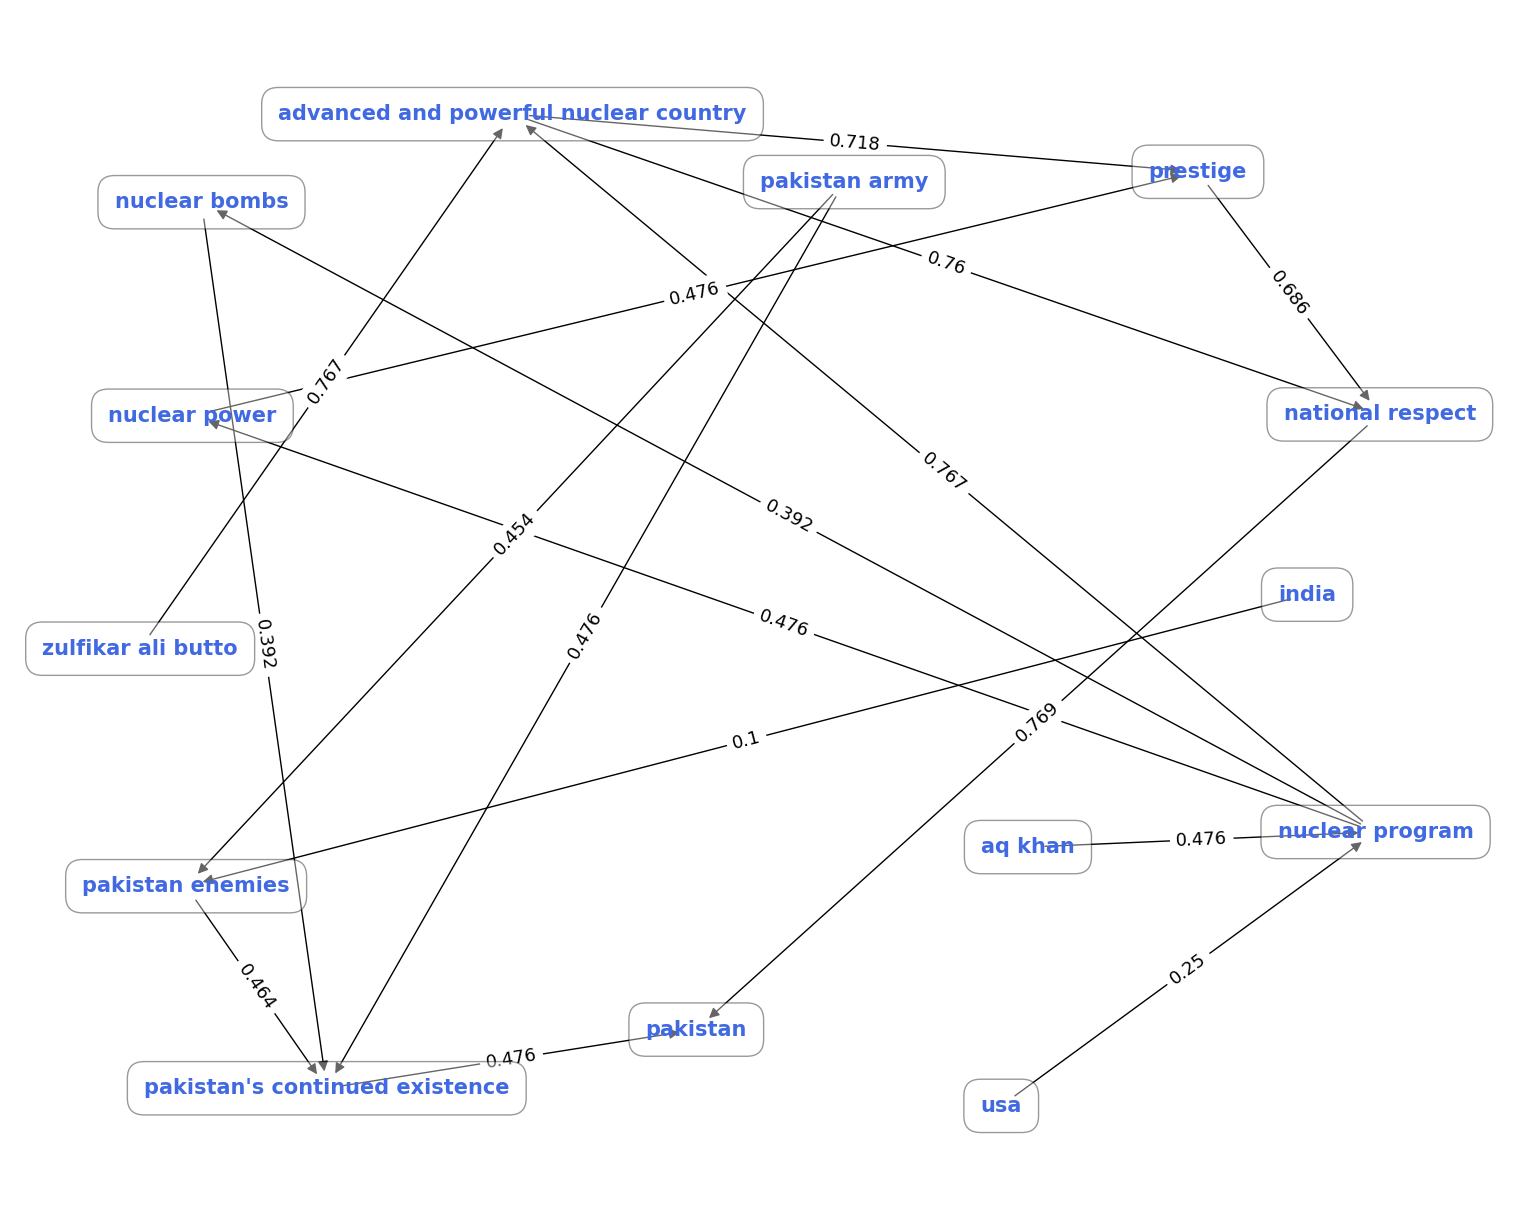

In [69]:
cwg = nx.DiGraph()

cwg.add_node("pakistan army",id = str("pakistan army"),title=str("pakistan army"),x=615,y=200)
cwg.add_node("india",id = str("india"),title=str("india"),x=615,y=200)
cwg.add_node("pakistan enemies",id = str("pakistan enemies"),title=str("pakistan enemies"),x=615,y=200)
cwg.add_node("pakistan's continued existence",id = str("pakistan's continued existence"),title=str("pakistan's continued existence"),x=615,y=200)
cwg.add_node("aq khan",id = str("aq khan"),title=str("aq khan"),x=615,y=200)
cwg.add_node("nuclear program",id = str("nuclear program"),title=str("nuclear program"),x=615,y=200)
cwg.add_node("nuclear bombs",id = str("nuclear bombs"),title=str("nuclear bombs"),x=615,y=200)
cwg.add_node("nuclear power",id = str("nuclear power"),title=str("nuclear power"),x=615,y=200)
cwg.add_node("prestige",id = str("prestige"),title=str("prestige"),x=615,y=200)
cwg.add_node("national respect",id = str("national respect"),title=str("national respect"),x=615,y=200)
cwg.add_node("advanced and powerful nuclear country",id = str("advanced and powerful nuclear country"),title=str("advanced and powerful nuclear country"),x=615,y=200)
cwg.add_node("usa",id = str("usa"),title=str("usa"),x=615,y=200)
cwg.add_node("zulfikar ali butto",id = str("zulfikar ali butto"),title=str("zulfikar ali butto"),x=615,y=200)
cwg.add_node("pakistan",id = str("pakistan"),title=str("pakistan"),x=615,y=200)

sources = ["pakistan army","pakistan army","india","pakistan enemies","pakistan's continued existence","aq khan","nuclear program"
,"nuclear bombs","nuclear program","nuclear power","prestige","national respect","nuclear program","advanced and powerful nuclear country"
,"advanced and powerful nuclear country","usa","zulfikar ali butto"]

destinations = ["pakistan enemies","pakistan's continued existence","pakistan enemies","pakistan's continued existence"
,"pakistan","nuclear program","nuclear bombs","pakistan's continued existence","nuclear power","prestige","national respect"
,"pakistan","advanced and powerful nuclear country","prestige","national respect","nuclear program","advanced and powerful nuclear country"]

types = ["i","p","p","i","p","p","p","p","p","p","p","p","p","p","p","i","p"]

for s,d,w,t in zip(sources,destinations, weights,types):
    if w < 0:
        w = w * -1
    cwg.add_edge(s, d, predicate=w, nature = t)
    #cwg.add_edge(s, d, predicate=str(ce[1]), polarity = p[0], weight = w)
    
print("Nodes:",len(cwg.nodes))
print("Edges:",len(cwg.edges))

for e in cwg.edges(data=True):
    print(e[0],",",e[2],",",e[1])
    

pos = nx.spring_layout(cwg, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cwg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cwg.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cwg,'predicate')
#edge_labels2 = nx.get_edge_attributes(cwg,'polarity')
#edge_labels3 = nx.get_edge_attributes(cwg,'weight')

nx.draw_networkx_edge_labels(cwg, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

In [70]:
def FromTruthTable(i,inputs):
    count = 0

    if inputs==1:
        for a in range(1, -1, -1):
            if i == count:
                return (a)
            count = count+1

    if inputs==2:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                if i == count:
                    t = (a,b)
                    return t
                count = count+1
        
    elif inputs==3:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    if i == count:
                        t = (a,b,c)
                        return t
                    count = count+1
    
    elif inputs==4:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        if i == count:
                            t = (a,b,c,d)
                            return t
                        count = count+1

    elif inputs==5:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        for e in range(1,-1,-1):
                            if i == count:
                                t = (a,b,c,d,e)
                                return t
                            count = count+1
                            
    elif inputs==6:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        for e in range(1,-1,-1):
                            for f in range(1,-1,-1):
                                if i == count:
                                    t = (a,b,c,d,e,f)
                                    return t
                                count = count+1

class Tutorial1:
    #def __init__(self):
    def Add(self, net, id ,name, outcomes, x_pos, y_pos):
        e = self.create_cpt_node(net, id, name, outcomes, x_pos, y_pos)
        nodeNames.append(net.get_node_name(e))
        nodeIds.append(net.get_node_id(e))
        nodeHandles.append(e)
        net.write_file("./GeNie CBN/CBN.xdsl")
        
    def AddArcs(self, net, s, d):
        net.add_arc(s, d)
        net.write_file("./GeNie CBN/CBN.xdsl")

    def Addcpts(self, net, h, cpt):
        net. set_node_definition(h, cpt)
        net.write_file("./GeNie CBN/CBN.xdsl")
        
    def create_cpt_node(self, net, id, name, outcomes, x_pos, y_pos):
        handle = net.add_node(pysmile.NodeType.CPT, id)
        net.set_node_name(handle, name)
        net.set_node_position(handle, x_pos, y_pos, 85, 55)
        initial_outcome_count = net.get_outcome_count(handle)
        for i in range(0, initial_outcome_count):
            net.set_outcome_id(handle, i, outcomes[i])
        for i in range(initial_outcome_count, len(outcomes)):
            net.add_outcome(handle, outcomes[i])
        return handle
    
    def print_cpt_matrix(self, net, node_handle):
        cpt = net.get_node_definition(node_handle)
        return cpt
    

net = pysmile.Network()
obj = Tutorial1()
outcomes = ["True","False"]
nodeNames = []    
nodeIds = []
nodeHandles = []
# cpts=[]
PDs = []
baseline = 0.1
x = 160
y = 40

for node in cwg.nodes: 
    obj.Add(net, str(node),str(node), outcomes, x, y)
        
for e in cwg.edges():
    for id,name in zip(nodeIds,nodeNames):
        if name == e[0]:
            s = id
        if name == e[1]:
            d = id 
    obj.AddArcs(net, s, d)
    
for handle,name in zip(nodeHandles,nodeNames): 
    print("Handle:" + str(handle))
    print("Node:" + name)
    print(net.get_outcome_ids(handle))
    parent_ids = net.get_parent_ids(handle)
    num_parents = len(parent_ids)
    print("Number of Parents:" + str(num_parents))
    cpt = []
    parent_names = []
    totalCols = 1
    if num_parents == 0:
        cpt.append(baseline)
        cpt.append(1 - baseline)
        print("CPT:" + str(cpt))
        obj.Addcpts(net, handle, cpt)
        print("CPT from Network:")
        print(obj.print_cpt_matrix(net, handle))
        print("********************************************************************")
    elif num_parents > 0:
        for par in parent_ids:
                parent_names.append(net.get_node_name(par))
                totalCols = 2 ** num_parents
        print("Names of Parents:" + str(parent_names))
        print("totalCols:" + str(totalCols))
        for j in range(0, totalCols):
            print("j: "+str(j))
            PI = 1
            NI = 1
            ans = FromTruthTable(j,num_parents)
            print("From Dummy: "+str(ans))
            #for parent in parent_names:
            for p in range(0,len(parent_names)):
                for edge in cwg.edges(data=True):
                    if str(parent_names[p]) == str(edge[0]) and str(name) == str(edge[1]):
                        for nbr, eattr in edge[2].items():
                            if nbr == "predicate":
                                polarity = eattr
                            if nbr == "nature":
                                n = eattr
                        break
                print("Parent: " + parent_names[p])
                print("Polarity: " + str(polarity))
                print("p: "+str(p))
                if num_parents > 1:
                    if ans[p] == 0:
                        polarity = 0
                        print("New Polarity: " + str(polarity))
                else:
                    if ans == 0:
                        polarity = 0
                        print("New Polarity: " + str(polarity))
                #if polarity >= 0:
                    #polarity = polarity/4
                    #PI = PI * (1 - polarity)
                #else:
                    #polarity = polarity/ (-4)
                    #NI = NI * (1 - abs(polarity))
                if n == 'p':
                    PI = PI * (1 - polarity)
                else:
                    NI = NI * (1 - polarity)
            CP = 0
            PI = 1 - (1-baseline) * PI
            NI = NI
            CP = PI * NI  
            #CP = 0
            #if PI > NI:
                #CP = baseline + ((1 - baseline) * AI)
            #elif PI < NI:
                #CP = baseline - (baseline * AI)
            #elif PI == NI:
                #CP = baseline
            if CP == 0:
                CP = 0.01
            cpt.append(round(CP, 3))
            cpt.append(round((1 - CP), 3))
            pds = []
            pds.append(round(CP, 3))
            pds.append(round((1 - CP), 3))
            PDs.append(pds)
        print("CPT:" + str(cpt))
        obj.Addcpts(net, handle, cpt)
        print("CPT from Network:")
        print(obj.print_cpt_matrix(net, handle))
        print("********************************************************************")

Handle:0
Node:pakistan army
['True', 'False']
Number of Parents:0
CPT:[0.1, 0.9]
CPT from Network:
[0.1, 0.9]
********************************************************************
Handle:1
Node:india
['True', 'False']
Number of Parents:0
CPT:[0.1, 0.9]
CPT from Network:
[0.1, 0.9]
********************************************************************
Handle:2
Node:pakistan enemies
['True', 'False']
Number of Parents:2
Names of Parents:['pakistan army', 'india']
totalCols:4
j: 0
From Dummy: (1, 1)
Parent: pakistan army
Polarity: 0.454
p: 0
Parent: india
Polarity: 0.1
p: 1
j: 1
From Dummy: (1, 0)
Parent: pakistan army
Polarity: 0.454
p: 0
Parent: india
Polarity: 0.1
p: 1
New Polarity: 0
j: 2
From Dummy: (0, 1)
Parent: pakistan army
Polarity: 0.454
p: 0
New Polarity: 0
Parent: india
Polarity: 0.1
p: 1
j: 3
From Dummy: (0, 0)
Parent: pakistan army
Polarity: 0.454
p: 0
New Polarity: 0
Parent: india
Polarity: 0.1
p: 1
New Polarity: 0
CPT:[0.104, 0.896, 0.055, 0.945, 0.19, 0.81, 0.1, 0.9]
CPT fr

In [71]:
P = PDs
# Set Reference as DeMorgan Derived CPT
Q = [[0.091, 0.909], [0.01, 0.99], [0.91, 0.09], [0.1, 0.9], [0.34, 0.66], [0.337, 0.663], [1.0, 0.0], [0.991, 0.009], [0.337, 0.663], [0.034, 0.966], [0.991, 0.009], [0.1, 0.9], [0.309, 0.691], [0.91, 0.09], [0.034, 0.966], [0.1, 0.9], [0.91, 0.09], [0.1, 0.9], [0.91, 0.09], [0.1, 0.9], [0.969, 0.031], [0.694, 0.306], [0.91, 0.09], [0.1, 0.9], [0.991, 0.009], [0.91, 0.09], [0.91, 0.09], [0.1, 0.9], [0.969, 0.031], [0.91, 0.09], [0.694, 0.306], [0.1, 0.9], [0.991, 0.009], [0.91, 0.09], [0.91, 0.09], [0.1, 0.9]]
# Set Reference as CAST Logic Derived CPT
# Q = [[0.1, 0.9], [0.01, 0.99], [0.91, 0.09], [0.1, 0.9], [1.0, 0.0], [0.974, 0.026], [1.0, 0.0], [0.991, 0.009], [0.974, 0.026], [0.034, 0.966], [0.991, 0.009], [0.1, 0.9], [0.969, 0.031], [0.91, 0.09], [0.694, 0.306], [0.1, 0.9], [0.91, 0.09], [0.1, 0.9], [0.91, 0.09], [0.1, 0.9], [0.969, 0.031], [0.694, 0.306], [0.91, 0.09], [0.1, 0.9], [0.991, 0.009], [0.91, 0.09], [0.91, 0.09], [0.1, 0.9], [0.969, 0.031], [0.91, 0.09], [0.694, 0.306], [0.1, 0.9], [0.991, 0.009], [0.91, 0.09], [0.91, 0.09], [0.1, 0.9]]
print(len(P))
print(P)
print(len(Q))
print(Q)

36
[[0.104, 0.896], [0.055, 0.945], [0.19, 0.81], [0.1, 0.9], [0.382, 0.618], [0.283, 0.717], [0.713, 0.287], [0.528, 0.472], [0.243, 0.757], [0.054, 0.946], [0.453, 0.547], [0.1, 0.9], [0.396, 0.604], [0.528, 0.472], [0.075, 0.925], [0.1, 0.9], [0.453, 0.547], [0.1, 0.9], [0.528, 0.472], [0.1, 0.9], [0.867, 0.133], [0.528, 0.472], [0.746, 0.254], [0.1, 0.9], [0.932, 0.068], [0.717, 0.283], [0.784, 0.216], [0.1, 0.9], [0.951, 0.049], [0.79, 0.21], [0.79, 0.21], [0.1, 0.9], [0.891, 0.109], [0.528, 0.472], [0.792, 0.208], [0.1, 0.9]]
36
[[0.091, 0.909], [0.01, 0.99], [0.91, 0.09], [0.1, 0.9], [0.34, 0.66], [0.337, 0.663], [1.0, 0.0], [0.991, 0.009], [0.337, 0.663], [0.034, 0.966], [0.991, 0.009], [0.1, 0.9], [0.309, 0.691], [0.91, 0.09], [0.034, 0.966], [0.1, 0.9], [0.91, 0.09], [0.1, 0.9], [0.91, 0.09], [0.1, 0.9], [0.969, 0.031], [0.694, 0.306], [0.91, 0.09], [0.1, 0.9], [0.991, 0.009], [0.91, 0.09], [0.91, 0.09], [0.1, 0.9], [0.969, 0.031], [0.91, 0.09], [0.694, 0.306], [0.1, 0.9], [0

In [72]:
kl = []
for i in range(0,len(P)):
    k = kl_div(Q[i],P[i])
    kl.append(k.sum())

kl = np.array(kl)
kl_divergence = round((kl.sum())/14,3)
print(kl_divergence)

0.367


In [73]:
kl = []
for i in range(0,len(P)):
    k = kl_div(P[i],Q[i])
    kl.append(k.sum())

kl = np.array(kl)
kl_divergence = round((kl.sum())/14,3)
print(kl_divergence)

inf
